In [54]:
import numpy as np
from scipy.special import genlaguerre
from math import factorial, gamma
import os, sys
import matplotlib.pyplot as plt

tk_path = '/Users/sweveret/repos/kl-tools/kl_tools'
sys.path.insert(0, tk_path)
import utils

%matplotlib inline

## Polar "Exponential Shapelet", should be the same as a disclet

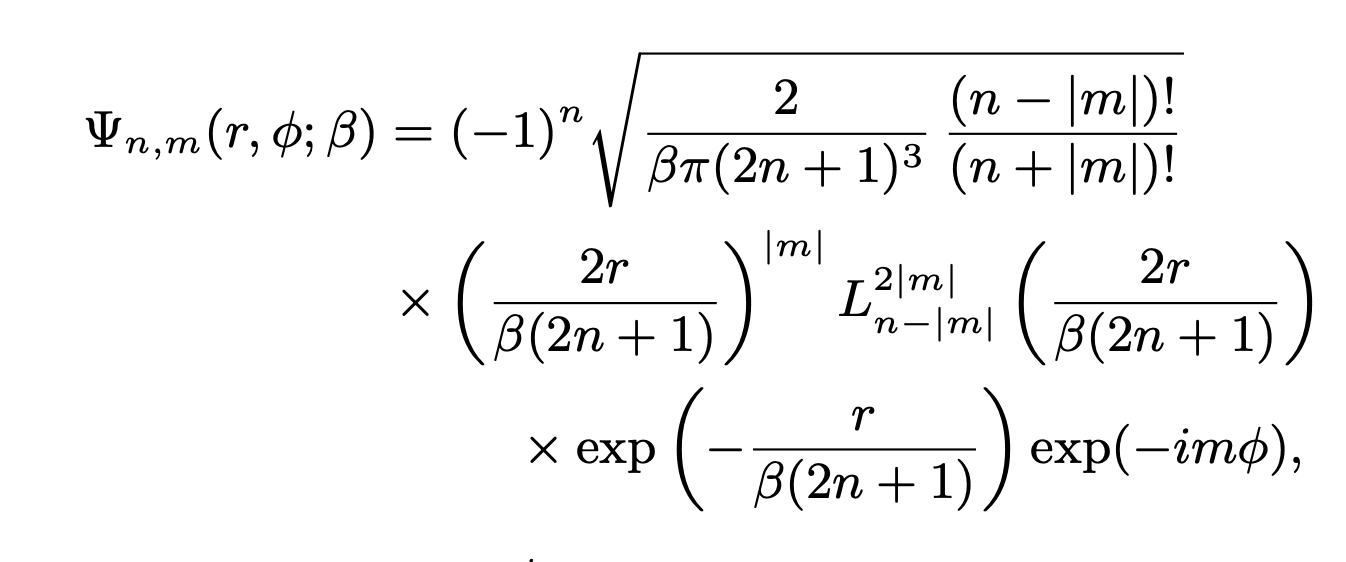

In [33]:
n, alpha = 3, 1
L = genlaguerre(n, alpha)
print(L)

         3     2
-0.1667 x + 2 x - 6 x + 4


In [56]:
def factorial_ratio(num, den):
    '''
    evaluate the ratio of num! / den!
    '''
    
    for v in [num, den]:
        if not isinstance(v, int):
            raise TypeError('Factorial inputs must be ints!')
    
    # make it so the numerator is always greater 
    if num < den:
        num, den = den, num
        flip = True
    else:
        flip = False
        
    diff = num - den
        
    product = 1
    
    for i in range(den+1, num+1):
        product *= i
        
    if flip is True:
        return 1 / product
    else:
        return product
        
    
def eval_disclet(r, phi, n, m, beta):
    '''
    r: float, np.array
        The array of r values to evaluate at
    phi: float, np.array
        The array of phi values to evaluate at
    beta: float
        The scale factor of the disclets
    n: int
        The principle quantum number
    m: int
        The "magnetic" quantum number
        
    Evaluate disclet at all (r, phi) values
    '''
    
    if n < 0:
        raise ValueError('n must be non-negative!')
    if abs(m) > n:
        raise ValueError('|m| cannot be greater than n!')
    
    norm1 = (-1)**n
    norm2 = np.sqrt(2. / (np.pi * beta * (2*n+1)**3))
    norm3 = np.sqrt(factorial_ratio(n-abs(m), n+abs(m)))
    
    norm = norm1 * norm2 * norm3
             
    rad1 = ((2.*r) / (beta * (2*n+1)))**abs(m)
    
    lag = genlaguerre(n-abs(m), 2*abs(m))
    rad2 = lag( (2.*r) / (beta*(2*n+1)) )
        
    exp = np.exp( -r / (beta * (2*n+1)) )
    
    rad = rad1 * rad2 * exp
    
    ang = np.exp(-1j * m * phi)
    
    return norm * rad * ang

def eval_sersiclet(r, phi, beta, l, m, n, b):
    '''
    Evaluate sersiclet at all (r, phi) values using
    def from https://arxiv.org/abs/1106.6045

    r: float, np.array
        The array of r values to evaluate at
    phi: float, np.array
        The array of phi values to evaluate at
    beta: float
        The scale factor of the disclets
    l: int
        The principle quantum number
    m: int
        The "magnetic" quantum number
    n: float
        The sersic index
    b: float
        Needed for general sersiclet
    '''
    
    k = 2*n - 1
    u = b * (r / beta)**(1/n)
    
    norm_inner = ( (beta**2 * n) / b**(2*n) ) * ( gamma(l + 2*n) / factorial(l) )
    norm = 1. / np.sqrt(norm_inner)
    
    lag = genlaguerre(l, k)(u)
    
    exp = np.exp( -(b/2.) * (r/beta)**(1./n) )
    
    rad = lag * exp
    
    ang = np.exp(-1j * m * phi)
    
    return norm * rad * ang

In [57]:
assert factorial_ratio(5,10) == (1. / (6*7*8*9*10))
assert factorial_ratio(10,5) == (6*7*8*9*10)

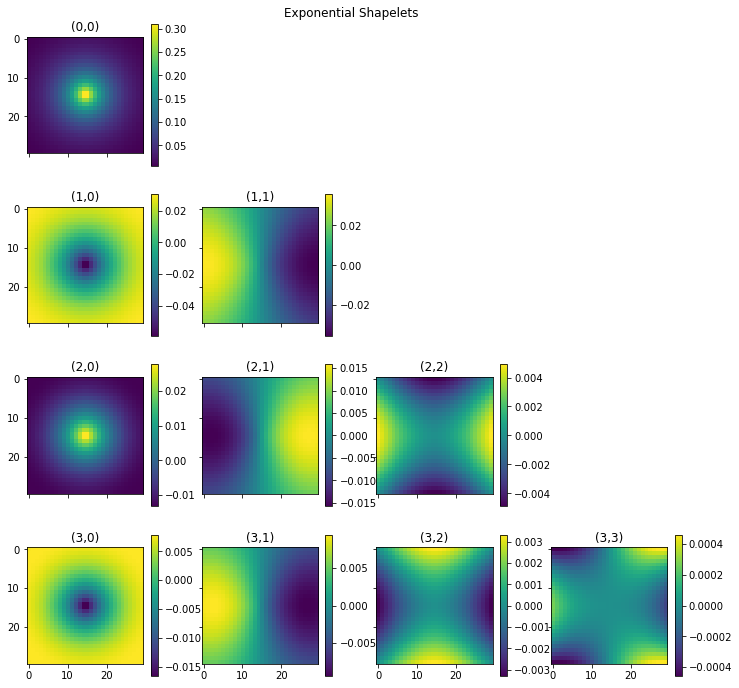

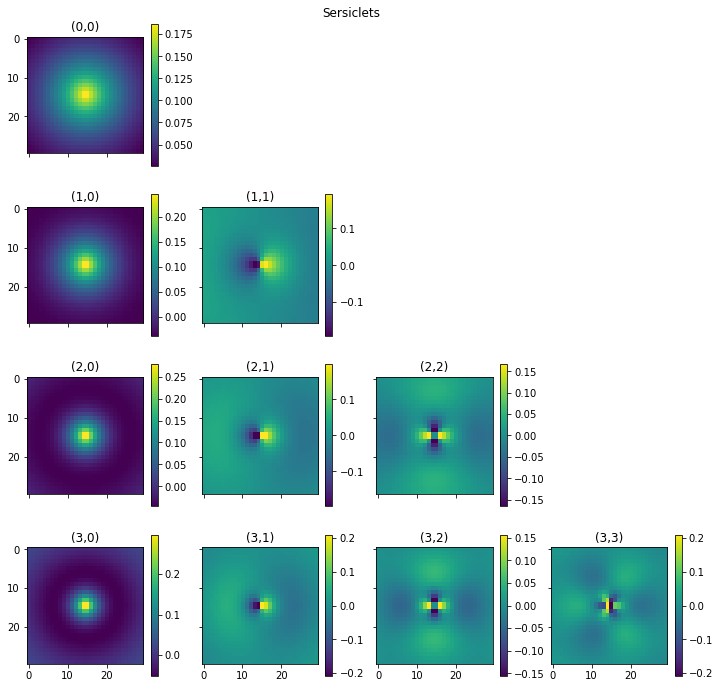

Text(0.5, 0.9, 'Sersiclets')

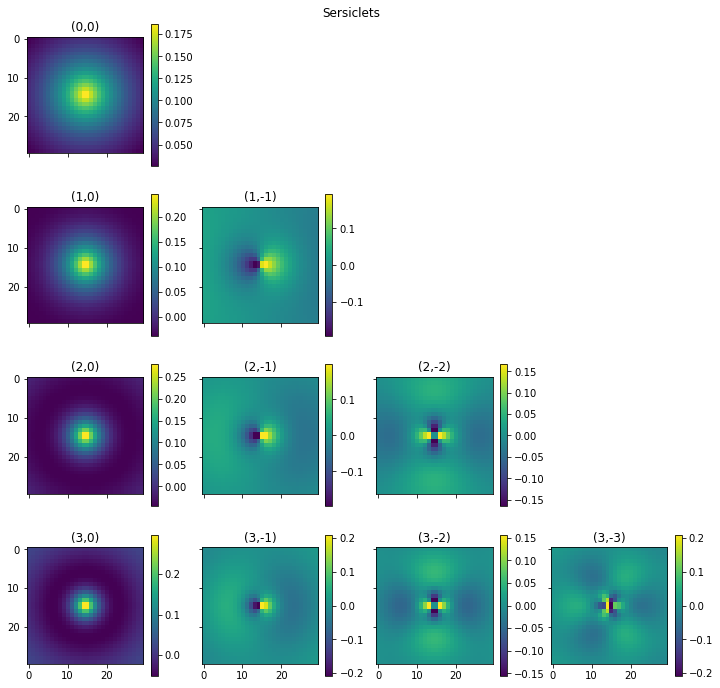

In [83]:
nx, ny = 30, 30
beta = 5
X, Y = utils.build_map_grid(nx, ny)

R = np.sqrt(X**2 + Y**2)
Phi = np.arctan2(Y,X)

nmax = 3
nrows, ncols = nmax+1, nmax+1
s = (12,12)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=s)
for n in range(0, nmax+1):
    for m in range(0, n+1):
        ax = axes[n, m]
        disclet = eval_disclet(R, Phi, n, m, beta)

        im = ax.imshow(disclet.real)
        plt.colorbar(im, ax=ax)
        ax.set_title(f'({n},{m})')
    
for n in range(nmax, -1, -1):
    for m in range(nmax, -1, -1):
        ax = axes[n,m]
        if abs(m) > n:
            ax.axis('off')
    
plt.suptitle('Exponential Shapelets', y=.9)
plt.show()


b = 1
sindx = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=s)
for l in range(0, nmax+1):
    for m in range(0, l+1):
        ax = axes[l, m]
        disclet = eval_sersiclet(R, Phi, beta, l, m, sindx, b)
        
        im = ax.imshow(disclet.real)
        plt.colorbar(im, ax=ax)
        ax.set_title(f'({l},{m})')
        
for l in range(nmax, -1, -1):
    for m in range(nmax, -1, -1):
        ax = axes[l,m]
        if abs(m) > l:
            ax.axis('off')
        
plt.suptitle('Sersiclets', y=.9)
plt.show()

b = 1
sindx = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=s)
for l in range(0, nmax+1):
    for m in range(0,l+1):
        ax = axes[l, m]
        disclet = eval_sersiclet(R, Phi, beta, l, -m, sindx, b)
        
        im = ax.imshow(disclet.real)
        plt.colorbar(im, ax=ax)
        ax.set_title(f'({l},{-m})')
        
for l in range(nmax, -1, -1):
    for m in range(nmax, -1, -1):
        ax = axes[l,m]
        if abs(m) > l:
            ax.axis('off')
        
plt.suptitle('Sersiclets', y=.9)

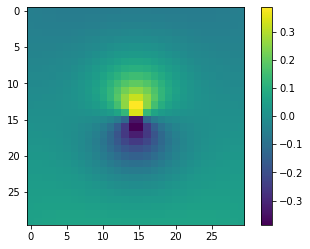

In [87]:
l, m = 1, 1
b1 = eval_sersiclet(R, Phi, beta, l, m, sindx, b)
b2 = eval_sersiclet(R, Phi, beta, l, -m, sindx, b)

diff = b1.imag - b2.imag
plt.imshow(diff)
plt.colorbar()